Resultados guardados en sentiment_analysis_results.csv
                review_id                 user_id             business_id  \
0  J--iW5dA72XIV7lhrP2lgw  4PvJWRsaQ18EDaAp58esTQ  iCKF72z3fqRTF1vxdBZINQ   
1  My8ugWN8KhVwiAgmGQ5AiQ  pgwyBgu_4jRx862aa1rlzw  wFES5bGDiPANW13hNHnXOQ   
2  HJw41bthcu2jvFTz_VO39Q  9HMVNKy3jZPJGMDlkoc2-g  M0r9lUn2gLFYgIwIfG8-bQ   
3  GohIIt4qTYlw_14I9AuMww  V8wiuXo9CYKYIZuyI-dZfA  2myVMP_l-9f9JIZewm19Cg   
4  fqd4e1XtfRLleT8bQBoceQ  24-3ri7FV2rB22C9AhTwNA  b7V_5q22_eTeHlYzq1bpFw   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       0      0     0   
2      4       0      0     0   
3      1       3      2     0   
4      3       0      0     0   

                                                text                date  \
0  stumbled across the village pub beer garden on... 2012-03-05 00:11:43   
1  absolutely amazing dinner tonight came here to... 2015-08-23 04:31:49   
2  stopped by here before a blues game the atmosp... 20

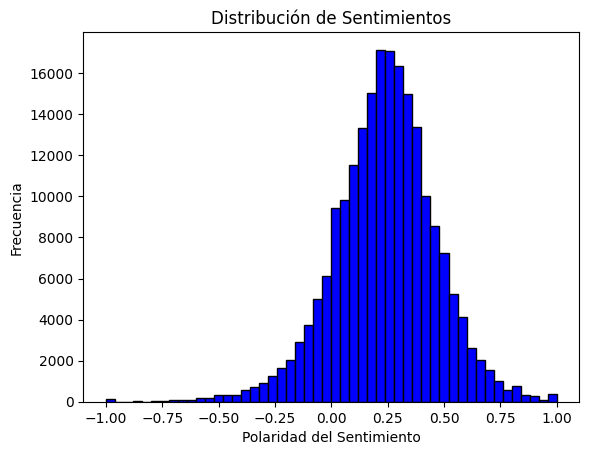

Reseñas más positivas:
                                                   text  sentiment
958   imo the best hotel in reno and i ve stayed in ...        1.0
1779  a must if in the neighborhood and even if you ...        1.0
1821  wonderful food and they have music on thursday...        1.0
1872  ordered salmon supreme it became my fav entree...        1.0
1885  hair of the dog is the best morgan is totally ...        1.0
Reseñas más negativas:
                                                    text  sentiment
2765   this restaurant has the worst service ever the...       -1.0
2946                  worst pizza and worst service ever       -1.0
4789   one of the worst mcdonalds around employees do...       -1.0
6975   waited at my table for over 5 minutes and the ...       -1.0
10139  this has got to be the worst pad thai i ve eve...       -1.0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

def load_reviews(file_path):
    """
    Carga las reseñas desde un archivo PARQUET a un DataFrame de pandas.

    :param file_path: Ruta al archivo PARQUET que contiene las reseñas.
    :return: DataFrame con las reseñas.
    """
    df = pd.read_parquet(file_path)
    return df

def analyze_sentiment(text):
    """
    Analiza el sentimiento de un texto dado.

    :param text: Reseña en formato de texto.
    :return: Polaridad del sentimiento (valor entre -1 y 1).
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity

def add_sentiment_column(df):
    """
    Añade una columna de sentimiento al DataFrame.

    :param df: DataFrame que contiene las reseñas.
    :return: DataFrame con una columna adicional de sentimiento.
    """
    df['sentiment'] = df['text'].apply(analyze_sentiment)
    return df

def save_results(df, output_path):
    """
    Guarda el DataFrame con los resultados del análisis de sentimiento a un archivo CSV.

    :param df: DataFrame que contiene las reseñas y los resultados del análisis de sentimiento.
    :param output_path: Ruta al archivo CSV donde se guardarán los resultados.
    """
    df.to_csv(output_path, index=False)

def main():
    """
    Función principal que ejecuta el flujo completo del análisis de sentimiento.

    1. Carga las reseñas desde un archivo PARQUET.
    2. Analiza el sentimiento de cada reseña.
    3. Guarda los resultados en un archivo CSV.
    """
    # Ruta al archivo de entrada y al archivo de salida
    input_file_path = '../0_Dataset/Data_Limpia/Yelp/review_FL_reducido.parquet'
    output_file_path = 'sentiment_analysis_results.csv'
    
    # Cargar reseñas
    reviews_df = load_reviews(input_file_path)
    
    # Añadir columna de sentimiento
    reviews_df = add_sentiment_column(reviews_df)
    
    # Guardar resultados
    save_results(reviews_df, output_file_path)
    print(f"Resultados guardados en {output_file_path}")

    # Mostrar las primeras filas del DataFrame
    print(reviews_df.head())
    
    # Mostrar información del DataFrame
    print(reviews_df.info())
    
    # Calcular la polaridad del sentimiento promedio por categoría de negocio
    sentiment_avg_by_category = reviews_df.groupby('business_id')['sentiment'].mean().reset_index()
    print(sentiment_avg_by_category.head())
    
    # Crear un histograma de la polaridad del sentimiento
    plt.hist(reviews_df['sentiment'], bins=50, color='blue', edgecolor='black')
    plt.title('Distribución de Sentimientos')
    plt.xlabel('Polaridad del Sentimiento')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Reseñas más positivas
    most_positive_reviews = reviews_df.nlargest(5, 'sentiment')
    print("Reseñas más positivas:")
    print(most_positive_reviews[['text', 'sentiment']])
    
    # Reseñas más negativas
    most_negative_reviews = reviews_df.nsmallest(5, 'sentiment')
    print("Reseñas más negativas:")
    print(most_negative_reviews[['text', 'sentiment']])
    
    # Guardar la polaridad del sentimiento promedio por categoría en un archivo CSV
    sentiment_avg_by_category.to_csv('sentiment_avg_by_category.csv', index=False)

# Ejecutar la función principal
if __name__ == "__main__":
    main()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import streamlit as st

def load_reviews(file_path):
    df = pd.read_parquet(file_path)
    return df

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def add_sentiment_column(df):
    df['sentiment'] = df['text'].apply(analyze_sentiment)
    return df

def save_results(df, output_path):
    df.to_csv(output_path, index=False)

def main():
    st.title("Análisis de Sentimiento de Reseñas")
    
    # Ruta al archivo de entrada y al archivo de salida
    input_file_path = st.text_input("Ruta al archivo de reseñas (PARQUET):")
    output_file_path = st.text_input("Ruta para guardar resultados (CSV):")

    if st.button("Ejecutar análisis de sentimiento"):
        reviews_df = load_reviews(input_file_path)
        reviews_df = add_sentiment_column(reviews_df)
        save_results(reviews_df, output_file_path)
        st.success(f"Resultados guardados en {output_file_path}")

        st.write("Primeras filas del DataFrame:")
        st.write(reviews_df.head())

        st.write("Información del DataFrame:")
        st.write(reviews_df.info())

        sentiment_avg_by_category = reviews_df.groupby('business_id')['sentiment'].mean().reset_index()
        st.write("Promedio de polaridad de sentimiento por categoría de negocio:")
        st.write(sentiment_avg_by_category.head())

        plt.hist(reviews_df['sentiment'], bins=50, color='blue', edgecolor='black')
        plt.title('Distribución de Sentimientos')
        plt.xlabel('Polaridad del Sentimiento')
        plt.ylabel('Frecuencia')
        st.pyplot(plt.gcf())

        most_positive_reviews = reviews_df.nlargest(5, 'sentiment')
        st.write("Reseñas más positivas:")
        st.write(most_positive_reviews[['text', 'sentiment']])

        most_negative_reviews = reviews_df.nsmallest(5, 'sentiment')
        st.write("Reseñas más negativas:")
        st.write(most_negative_reviews[['text', 'sentiment']])

        sentiment_avg_by_category.to_csv('sentiment_avg_by_category.csv', index=False)
        st.success("Promedio de polaridad de sentimiento por categoría guardado en 'sentiment_avg_by_category.csv'")

if __name__ == "__main__":
    main()


2024-06-25 14:31:47.853 
  command:

    streamlit run C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import streamlit as st

def load_reviews(file_path):
    df = pd.read_parquet(file_path)
    return df

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def add_sentiment_column(df):
    df['sentiment'] = df['text'].apply(analyze_sentiment)
    return df

def calculate_kpi(df):
    positive_reviews = df[df['sentiment'] > 0.1].shape[0]
    negative_reviews = df[df['sentiment'] < -0.1].shape[0]
    neutral_reviews = df[(df['sentiment'] <= 0.1) & (df['sentiment'] >= -0.1)].shape[0]
    total_reviews = df.shape[0]

    positive_percentage = (positive_reviews / total_reviews) * 100
    negative_percentage = (negative_reviews / total_reviews) * 100
    neutral_percentage = (neutral_reviews / total_reviews) * 100

    return positive_percentage, negative_percentage, neutral_percentage

def main():
    st.title("Análisis de Sentimiento de Reseñas")

    input_file_path = st.text_input("Ruta al archivo de reseñas (PARQUET):")
    output_file_path = st.text_input("Ruta para guardar resultados (CSV):")

    if st.button("Ejecutar análisis de sentimiento"):
        reviews_df = load_reviews(input_file_path)
        reviews_df = add_sentiment_column(reviews_df)
        save_results(reviews_df, output_file_path)
        st.success(f"Resultados guardados en {output_file_path}")

        st.write("Primeras filas del DataFrame:")
        st.write(reviews_df.head())

        st.write("Información del DataFrame:")
        st.write(reviews_df.info())

        sentiment_avg_by_category = reviews_df.groupby('business_id')['sentiment'].mean().reset_index()
        st.write("Promedio de polaridad de sentimiento por categoría de negocio:")
        st.write(sentiment_avg_by_category.head())

        plt.hist(reviews_df['sentiment'], bins=50, color='blue', edgecolor='black')
        plt.title('Distribución de Sentimientos')
        plt.xlabel('Polaridad del Sentimiento')
        plt.ylabel('Frecuencia')
        st.pyplot(plt.gcf())

        most_positive_reviews = reviews_df.nlargest(5, 'sentiment')
        st.write("Reseñas más positivas:")
        st.write(most_positive_reviews[['text', 'sentiment']])

        most_negative_reviews = reviews_df.nsmallest(5, 'sentiment')
        st.write("Reseñas más negativas:")
        st.write(most_negative_reviews[['text', 'sentiment']])

        positive_percentage, negative_percentage, neutral_percentage = calculate_kpi(reviews_df)
        st.write(f"Porcentaje de reseñas positivas: {positive_percentage:.2f}%")
        st.write(f"Porcentaje de reseñas negativas: {negative_percentage:.2f}%")
        st.write(f"Porcentaje de reseñas neutrales: {neutral_percentage:.2f}%")

        sentiment_avg_by_category.to_csv('sentiment_avg_by_category.csv', index=False)
        st.success("Promedio de polaridad de sentimiento por categoría guardado en 'sentiment_avg_by_category.csv'")

if __name__ == "__main__":
    main()
